# Project: Wrangle and Analyze Twitter-Archive Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import requests
import os
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

%matplotlib inline

## Data Gathering

In [4]:
df_twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [9]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

with open(url.split('/')[-1], mode='wb') as file:
    file.write(response.content)

In [5]:
df_img = pd.read_csv('image-predictions.tsv', sep='\t')

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [16]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [ ]:
# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [6]:
df_tweet_json = pd.read_json('tweet-json.txt', lines=True)

## Assessing Data


In [79]:
df_twitter_archive.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1533,689999384604450816,NaN,NaN,2016-01-21 02:34:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Covach. He's trying to melt the snow. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/689999384...,10,10,Covach,None,None,None,None
110,871102520638267392,NaN,NaN,2017-06-03 20:33:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Never doubt a doggo 14/10 https://t.co/AbBLh2FZCH,NaN,NaN,NaN,https://twitter.com/animalcog/status/871075758...,14,10,None,doggo,None,None,None
571,801538201127157760,NaN,NaN,2016-11-23 21:29:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Wallace. He'll be your chau-fur this e...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/801538201...,12,10,Wallace,None,None,None,None
1154,725458796924002305,NaN,NaN,2016-04-27 22:57:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Pup had to be removed cuz it wouldn't have bee...,NaN,NaN,NaN,https://twitter.com/foxdeportes/status/7251360...,13,10,None,None,None,None,None
487,814153002265309185,NaN,NaN,2016-12-28 16:56:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Oshie. He's ready to party. Bought tha...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/814153002...,12,10,Oshie,None,None,None,None


In [5]:
df_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [109]:
#check for incorrect or missing values in the twitter-archive-enhanced.csv name column
arr = np.empty([0], dtype='int16')
for i in range(0, df_twitter_archive['name'].values.size):
    if df_twitter_archive['name'].values[i] not in df_twitter_archive['text'].values[i]:
        arr = np.append(arr, [i])
arr.size    

743

In [7]:
# Check for instances where incorrect 'rating_denominator' exist
df_twitter_archive[df_twitter_archive['rating_denominator'] != 10].rating_denominator

313       0
342      15
433      70
516       7
784      11
902     150
1068     11
1120    170
1165     20
1202     50
1228     90
1254     80
1274     50
1351     50
1433     40
1598     20
1634    130
1635    110
1662     11
1663     16
1779    120
1843     80
2335      2
Name: rating_denominator, dtype: int64

In [75]:
#check for duplicated records in_enhanced data twitter_archive_enhanced data
df_twitter_archive[df_twitter_archive.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [33]:
#check for duplicate columns in different tables - twitter-archive-enhanced and tweet_json
all_columns = pd.Series(list(df_twitter_archive) + list(df_tweet_json))
all_columns[all_columns.duplicated()]

25                   source
26    in_reply_to_status_id
28      in_reply_to_user_id
dtype: object

In [32]:
#Store df_tweet_json in a csv file named 'tweet_json.csv'
df_tweet_json.to_csv('tweet_json.csv')

In [73]:
# View the structure of image-predictions data
df_img.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [41]:
#check for duplicate records in image-prediction data
df_img[df_img.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [134]:
df_img.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
124,668237644992782336,https://pbs.twimg.com/media/CUYOl0kW4AAVe_p.jpg,1,chow,0.809320,True,minivan,0.071311,False,Pekinese,0.037870,True
1942,861288531465048066,https://pbs.twimg.com/ext_tw_video_thumb/86128...,1,syringe,0.144712,False,oxygen_mask,0.106684,False,Bouvier_des_Flandres,0.082610,True
2033,883482846933004288,https://pbs.twimg.com/media/DELC9dZXUAADqUk.jpg,1,golden_retriever,0.943082,True,Labrador_retriever,0.032409,True,kuvasz,0.005501,True
1462,778383385161035776,https://pbs.twimg.com/media/Cs1fjyqWIAE2jop.jpg,1,collie,0.345266,True,borzoi,0.312823,True,Border_collie,0.213011,True
12,666073100786774016,https://pbs.twimg.com/media/CT5d9DZXAAALcwe.jpg,1,Walker_hound,0.260857,True,English_foxhound,0.175382,True,Ibizan_hound,0.097471,True


In [136]:
#check number of records that have same values in columns id and id_str in tweet_json data
df_tweet_json[df_tweet_json['id'] == df_tweet_json['id_str']].shape

(1518, 31)

In [135]:
# View the structure of tweet_json data
df_tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

In [137]:
df_tweet_json.sample(5)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
1096,2016-05-27 01:47:23+00:00,736010884653420544,736010884653420544,Right after you graduate vs when you remember ...,False,"[0, 115]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 736010860062248961, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,8652,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
125,2017-05-27 19:39:34+00:00,868552278524837888,868552278524837888,Say hello to Cooper. His expression is the sam...,False,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 868552270358618113, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,10539,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
545,2016-12-05 17:16:37+00:00,805823200554876929,805823200554876928,RT @dog_rates: This is Reginald. He's one magi...,False,"[0, 114]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,...,0,False,False,0.0,0.0,en,{'created_at': 'Fri Oct 07 00:06:50 +0000 2016...,NaN,NaN,NaN
1068,2016-06-08 01:45:19+00:00,740359016048689152,740359016048689152,This is Chase. He's in a predicament. 9/10 hel...,False,"[0, 67]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 740359008121298944, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,3610,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
995,2016-06-30 01:15:31+00:00,748324050481647620,748324050481647616,This is Duke. He permanently looks like he jus...,False,"[0, 77]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 748324042759938048, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,4078,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


### Quality issues
1. `twitter-archive-enhanced` missing data in the following columns(expanded_urls, retweeted_status_timestamp, retweeted_status_user_id, retweeted_status_id, in_reply_to_user_id, in_reply_to_status_id, name)

1. `twitter-archive-enhanced` - timestamp column has incorrect data type of object instead of datatime

1. `twitter-archive-enhanced` - 23 instances where incorrect 'rating_denominator' exist

1. `twitter-archive-enhanced` - 9 records had inappropriate rating_numerator variables i.e greater than 20 after correcting the rating_denominator issue

1. `twitter-archive-enhanced` - some records have more than one dog stage
 
1. `tweet_json` - missing data in the following columns(in_reply_to_status_id, in_reply_to_status_id_str, in_reply_to_user_id, in_reply_to_user_id_str, in_reply_to_screen_name, user, geo, coordinates, place, contributors, quoted_status, quoted_status_id_str,  quoted_status_id, retweeted_status, possibly_sensitive_appealable, possibly_sensitive

1. `tweet_json` - quoted_status, quoted_status_id_str columns contain same values - duplicated

1. `tweet_json` - id, id_str columns contain same values in 1518 instances - duplicated

### Tidiness issues
1. `twitter-archive-enhanced` - doggo, floofer, pupper, puppo are values of the 'dog stage' variable and are being used as columns 

1. `twitter-archive-enhanced and tweet_json` - duplicated columns in the tables(source, in_reply_to_status_id, in_reply_to_user_id). Other columns are duplicated but have different identifiers(created_at and timestamp, full_text and text)  

## Cleaning Data

In [90]:
# Make copies of original pieces of data
df_twitter_archive_copy = df_twitter_archive.copy()
df_tweet_json_copy = df_tweet_json.copy()
df_img_copy = df_img.copy()

### **Issue #1:** 
`twitter-archive-enhanced` missing data in the following columns(expanded_urls, retweeted_status_timestamp, retweeted_status_user_id, retweeted_status_id, in_reply_to_user_id, in_reply_to_status_id)

In [42]:
df_twitter_archive[['expanded_urls', 'retweeted_status_timestamp', 'retweeted_status_user_id', 'retweeted_status_id', 'in_reply_to_user_id', 'in_reply_to_status_id']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   expanded_urls               2297 non-null   object 
 1   retweeted_status_timestamp  181 non-null    object 
 2   retweeted_status_user_id    181 non-null    float64
 3   retweeted_status_id         181 non-null    float64
 4   in_reply_to_user_id         78 non-null     float64
 5   in_reply_to_status_id       78 non-null     float64
dtypes: float64(4), object(2)
memory usage: 110.6+ KB


#### **Define**:
Use the dataframe drop method to delete columns with missing values in df_twitter_archive_copy 

#### Code

In [91]:
df_twitter_archive_copy.drop(['expanded_urls', 'retweeted_status_timestamp', 'retweeted_status_user_id', 'retweeted_status_id', 'in_reply_to_user_id', 'in_reply_to_status_id'], axis='columns', inplace=True)

#### Test

In [92]:
df_twitter_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2356 non-null   int64 
 1   timestamp           2356 non-null   object
 2   source              2356 non-null   object
 3   text                2356 non-null   object
 4   rating_numerator    2356 non-null   int64 
 5   rating_denominator  2356 non-null   int64 
 6   name                2356 non-null   object
 7   doggo               2356 non-null   object
 8   floofer             2356 non-null   object
 9   pupper              2356 non-null   object
 10  puppo               2356 non-null   object
dtypes: int64(3), object(8)
memory usage: 202.6+ KB


### **Issue #2:** 
`twitter-archive-enhanced` - timestamp column has incorrect data type of object instead of datatime

#### Define
change the data type of timestamp column to datetime

#### Code

In [93]:
df_twitter_archive_copy['timestamp'] = pd.to_datetime(df_twitter_archive_copy['timestamp'])

#### Test

In [94]:
df_twitter_archive_copy['timestamp'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 2356 entries, 0 to 2355
Series name: timestamp
Non-Null Count  Dtype              
--------------  -----              
2356 non-null   datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1)
memory usage: 18.5 KB


### **Issue #3:** 
`twitter-archive-enhanced` - 23 instances where incorrect 'rating_denominator' exist

#### Define
- Extract the text variable of each of the 23 records to determine the correct rating.
- If the rating is impossible to determine from the text then delete record.

#### Code

In [57]:
count = 0
for i in arr1:
    print(str(arr1[count]) + ' ' + df_twitter_archive_copy.iloc[i].text + '\n')
    count += 1

313 @jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho

342 @docmisterio account started on 11/15/15

433 The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd

516 Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. 
Keep Sam smiling by clicking and sharing this link:
https://t.co/98tB8y7y7t https://t.co/LouL5vdvxx

784 RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…

902 Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE

1068 After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ

1120 Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv

1165 Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds

- Assign the appropriate rating_numerator & rating_denominator variables from the text variables

In [95]:
# 313 @jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 
#is tho
df_twitter_archive_copy.at[313, 'rating_numerator']= 13
df_twitter_archive_copy.at[313, 'rating_denominator']= 10

In [103]:
# 784 RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 
#search dog, and our second ever 14/10. RIP https:/…
df_twitter_archive_copy.at[784, 'rating_numerator']= 14
df_twitter_archive_copy.at[784, 'rating_denominator']= 10

In [100]:
# 1165 Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a
df_twitter_archive_copy.at[1165, 'rating_numerator']= 13
df_twitter_archive_copy.at[1165, 'rating_denominator']= 10

In [99]:
# 1202 This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 
#11/10 https://t.co/Kky1DPG4iq
df_twitter_archive_copy.at[1202, 'rating_numerator']= 11
df_twitter_archive_copy.at[1202, 'rating_denominator']= 10

In [101]:
# 1662 This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted 
#by the helicopter 10/10 https://t.co/7EsP8LmSp5
df_twitter_archive_copy.at[1662, 'rating_numerator']= 10
df_twitter_archive_copy.at[1662, 'rating_denominator']= 10

In [102]:
# 2335 This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv
df_twitter_archive_copy.at[2335, 'rating_numerator']= 9
df_twitter_archive_copy.at[2335, 'rating_denominator']= 10

- Delete records that rate_numerator variable cann't be extracted from the text variable

In [131]:
df_twitter_archive_copy.drop([1843, 1663, 1635, 1634, 1598, 1433, 1351, 1274, 1254, 1228, 1120, 902, 516, 433, 342, 1068, 1779], axis='rows', inplace=True)

#### Test

In [34]:
df_twitter_archive_copy[df_twitter_archive_copy['rating_denominator'] != 10]

,Unnamed: 0.1,Unnamed: 0,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,Dog Stage,truncated,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [132]:
df_twitter_archive_copy.shape

(2339, 7)

### **Issue #4:** 
`twitter-archive-enhanced` - 9 records had inappropriate rating_numerator variables i.e greater than 20 after correcting the rating_denominator issue.

#### Define
Delete the 9 records with inappropriate rating_numerator variables

#### Code

In [105]:
df_twitter_archive_copy.drop([1695, 759, 973, 188, 187, 2055, 289, 339, 691], axis='rows', inplace=True)

#### Test

In [19]:
df_twitter_archive_copy.rating_numerator.max()

17

### **Issue #5:** 
`twitter-archive-enhanced` - some records e.g index - 200, 191 have more than one dog stage

#### Define
Retrieve the text variables of records with more than on dog stage and determine the correct dog stage

#### Code

- View instances where records have more than one dog stage and determine the correct dog stage from the text variable.

In [109]:
df_twitter_archive_copy[((df_twitter_archive_copy['doggo']=='doggo') & (df_twitter_archive_copy['Dog Stage'] != 'doggo'))].index

Int64Index([], dtype='int64')

In [110]:
df_twitter_archive_copy[((df_twitter_archive_copy['floofer']=='floofer') & (df_twitter_archive_copy['Dog Stage'] != 'floofer'))].index

Int64Index([200], dtype='int64')

In [111]:
df_twitter_archive_copy['text'].iloc[200]

"At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk"

In [112]:
df_twitter_archive_copy.at[200, 'Dog Stage'] = 'floofer'

In [113]:
df_twitter_archive_copy['Dog Stage'].iloc[200]

'floofer'

In [114]:
df_twitter_archive_copy[((df_twitter_archive_copy['puppo']=='puppo') & (df_twitter_archive_copy['Dog Stage'] != 'puppo'))].index

Int64Index([191], dtype='int64')

In [115]:
df_twitter_archive_copy['text'].iloc[191]

"Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for https://t.co/cMhq16isel"

In [116]:
df_twitter_archive_copy.at[191, 'Dog Stage'] = 'puppo'

In [117]:
df_twitter_archive_copy['Dog Stage'].iloc[191]

'puppo'

In [119]:
df_twitter_archive_copy[((df_twitter_archive_copy['pupper']=='pupper') & (df_twitter_archive_copy['Dog Stage'] != 'pupper'))].index

Int64Index([460, 531, 565, 575, 705, 733, 778, 822, 889, 956, 1063, 1113], dtype='int64')

In [44]:
df_twitter_archive['text'].iloc[460]

'This is Dido. She\'s playing the lead role in "Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple." 13/10 (IG: didodoggo) https://t.co/m7isZrOBX7'

In [120]:
df_twitter_archive_copy.at[460, 'Dog Stage'] = 'doggo'

In [45]:
df_twitter_archive['text'].iloc[531]

'Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho'

In [121]:
df_twitter_archive['text'].iloc[565]

'Like doggo, like pupper version 2. Both 11/10 https://t.co/9IxWAXFqze'

In [122]:
df_twitter_archive['text'].iloc[575]

"This is Bones. He's being haunted by another doggo of roughly the same size. 12/10 deep breaths pupper everything's fine https://t.co/55Dqe0SJNj"

In [123]:
df_twitter_archive_copy.at[575, 'Dog Stage'] = 'pupper'

In [124]:
df_twitter_archive['text'].iloc[705]

"This is Pinot. He's a sophisticated doggo. You can tell by the hat. Also pointier than your average pupper. Still 10/10 would pet cautiously https://t.co/f2wmLZTPHd"

In [125]:
df_twitter_archive_copy.at[705, 'Dog Stage'] = 'doggo'

In [126]:
df_twitter_archive['text'].iloc[733]

'Pupper butt 1, Doggo 0. Both 12/10 https://t.co/WQvcPEpH2u'

In [127]:
df_twitter_archive['text'].iloc[778]

'RT @dog_rates: Like father (doggo), like son (pupper). Both 12/10 https://t.co/pG2inLaOda'

In [53]:
df_twitter_archive['text'].iloc[822]

'RT @dog_rates: This is just downright precious af. 12/10 for both pupper and doggo https://t.co/o5J479bZUC'

In [52]:
df_twitter_archive['text'].iloc[889]

'Meet Maggie &amp; Lila. Maggie is the doggo, Lila is the pupper. They are sisters. Both 12/10 would pet at the same time https://t.co/MYwR4DQKll'

In [54]:
df_twitter_archive['text'].iloc[956]

"Please stop sending it pictures that don't even have a doggo or pupper in them. Churlish af. 5/10 neat couch tho https://t.co/u2c9c7qSg8"

In [55]:
df_twitter_archive['text'].iloc[1063]

'This is just downright precious af. 12/10 for both pupper and doggo https://t.co/o5J479bZUC'

In [56]:
df_twitter_archive['text'].iloc[1113]

'Like father (doggo), like son (pupper). Both 12/10 https://t.co/pG2inLaOda'

#### Test

In [128]:
df_twitter_archive_copy['Dog Stage'].iloc[[460, 531, 565, 575, 705, 733, 778, 822, 889, 956, 1063, 1113]]

460      doggo
531      doggo
565      doggo
575     pupper
705      doggo
733      doggo
778      doggo
822      doggo
889      doggo
956      doggo
1063     doggo
1113     doggo
Name: Dog Stage, dtype: object

### **Issue #6:** 
`tweet_json` - quoted_status, quoted_status_id_str columns contain same duplicated values

#### Define
Delete quoted_status_id_str column

#### Code

In [ ]:
df_tweet_json_copy.drop(['quoted_status_id_str'], axis='columns', inplace=True)

#### Test

In [48]:
list(df_tweet_json_copy)

['id',
 'truncated',
 'display_text_range',
 'entities',
 'extended_entities',
 'is_quote_status',
 'retweet_count',
 'favorite_count',
 'favorited',
 'retweeted',
 'lang']

### **Issue #7:** 
`tweet_json` - missing data in the following columns(in_reply_to_status_id, in_reply_to_status_id_str, in_reply_to_user_id, in_reply_to_user_id_str, in_reply_to_screen_name, user, geo, coordinates, place, contributors, quoted_status, quoted_status_id, retweeted_status, possibly_sensitive_appealable, possibly_sensitive)

#### Define
Delete columns with missing values in tweet_json data

#### Code

In [15]:
df_tweet_json_copy.drop(['in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place', 'contributors', 'quoted_status', 'quoted_status_id_str',  'quoted_status_id', 'retweeted_status', 'possibly_sensitive_appealable', 'possibly_sensitive'], axis='columns', inplace=True)

#### Test

In [16]:
list(df_tweet_json_copy)

['created_at',
 'id',
 'id_str',
 'full_text',
 'truncated',
 'display_text_range',
 'entities',
 'extended_entities',
 'source',
 'is_quote_status',
 'retweet_count',
 'favorite_count',
 'favorited',
 'retweeted',
 'lang']

### **Issue #8:** 
`tweet_json` - id, id_str columns contain same values in 1518 instances - duplicated

#### Define
Delete  id_str column in the tweet_json data

#### Code

In [45]:
df_tweet_json_copy.drop(['id_str'], axis='columns', inplace=True)

#### Test

In [46]:
df_tweet_json_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  2354 non-null   int64 
 1   truncated           2354 non-null   bool  
 2   display_text_range  2354 non-null   object
 3   entities            2354 non-null   object
 4   extended_entities   2073 non-null   object
 5   is_quote_status     2354 non-null   bool  
 6   retweet_count       2354 non-null   int64 
 7   favorite_count      2354 non-null   int64 
 8   favorited           2354 non-null   bool  
 9   retweeted           2354 non-null   bool  
 10  lang                2354 non-null   object
dtypes: bool(4), int64(3), object(4)
memory usage: 138.1+ KB


### **Issue #9:** 
`twitter-archive-enhanced` - doggo, floofer, pupper, puppo are values of the 'dog stage' variable and are being used as columns 

#### Define
Create a column 'Dog Stage' and populate it using values in doggo, floofer, pupper, puppo columns then delete doggo, floofer, pupper, puppo columns

#### Code

In [108]:
# construct a single column 'Dog Stage' from twitter-archive-enhanced - doggo, floofer, pupper, puppo
#columns
df_twitter_archive_copy['Dog Stage'] = np.nan
max_row = df_twitter_archive_copy.shape[0]
for i in range(0, max_row):
    if df_twitter_archive_copy.iloc[i]['doggo'] == 'doggo':
        df_twitter_archive_copy.at[i, 'Dog Stage']= 'doggo'
    elif df_twitter_archive_copy.iloc[i]['floofer'] == 'floofer':
        df_twitter_archive_copy.at[i, 'Dog Stage']= 'floofer'
    elif df_twitter_archive_copy.iloc[i]['pupper'] == 'pupper':
        df_twitter_archive_copy.at[i, 'Dog Stage']= 'pupper'
    elif df_twitter_archive_copy.iloc[i]['puppo'] == 'puppo':
        df_twitter_archive_copy.at[i, 'Dog Stage']= 'puppo'

In [129]:
df_twitter_archive_copy.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis='columns', inplace=True)

#### Test

In [130]:
df_twitter_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2356 non-null   int64              
 1   timestamp           2356 non-null   datetime64[ns, UTC]
 2   source              2356 non-null   object             
 3   text                2356 non-null   object             
 4   rating_numerator    2356 non-null   int64              
 5   rating_denominator  2356 non-null   int64              
 6   Dog Stage           380 non-null    object             
dtypes: datetime64[ns, UTC](1), int64(3), object(3)
memory usage: 129.0+ KB


### **Issue #10:** 
`twitter-archive-enhanced and tweet_json` - duplicated columns in the tables(source, in_reply_to_status_id, in_reply_to_user_id). Other columns are duplicated but have different identifiers(created_at and timestamp, full_text and text)

#### Define
Delete the duplicated columns in tweet_json data (source, in_reply_to_status_id, created_at, in_reply_to_user_id, full_text).

#### Code

In [23]:
df_tweet_json_copy.drop(['source', 'created_at', 'full_text'], axis='columns', inplace=True)

#### Test

In [24]:
df_tweet_json_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  2354 non-null   int64 
 1   id_str              2354 non-null   int64 
 2   truncated           2354 non-null   bool  
 3   display_text_range  2354 non-null   object
 4   entities            2354 non-null   object
 5   extended_entities   2073 non-null   object
 6   is_quote_status     2354 non-null   bool  
 7   retweet_count       2354 non-null   int64 
 8   favorite_count      2354 non-null   int64 
 9   favorited           2354 non-null   bool  
 10  retweeted           2354 non-null   bool  
 11  lang                2354 non-null   object
dtypes: bool(4), int64(4), object(4)
memory usage: 156.4+ KB


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [144]:
# merge df_twitter_archive_copy with df_tweet_json_copy 
df_merge1 = pd.merge(df_twitter_archive_copy, df_tweet_json_copy, left_on='tweet_id', right_on='id', how='inner')

In [147]:
# merge df_merge1 with df_img_copy
df_merge2 = pd.merge(df_merge1, df_img_copy, left_on='tweet_id', right_on='tweet_id', how='left')

In [152]:
# Delete id column which is a duplicate of tweet_id
df_merge2.drop(['id'], axis='columns', inplace=True)

In [53]:
#Store df_merge2 in a csv file named 'twitter_archive_master.csv'
df_merge2.to_csv('twitter_archive_master.csv')

In [3]:
df_merge2 = pd.read_csv('twitter_archive_master.csv')

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [54]:
df_merge2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2328 entries, 0 to 2327
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2328 non-null   int64  
 1   timestamp           2328 non-null   object 
 2   source              2328 non-null   object 
 3   text                2328 non-null   object 
 4   rating_numerator    2328 non-null   int64  
 5   rating_denominator  2328 non-null   int64  
 6   Dog Stage           378 non-null    object 
 7   truncated           2328 non-null   bool   
 8   display_text_range  2328 non-null   object 
 9   entities            2328 non-null   object 
 10  extended_entities   2054 non-null   object 
 11  is_quote_status     2328 non-null   bool   
 12  retweet_count       2328 non-null   int64  
 13  favorite_count      2328 non-null   int64  
 14  favorited           2328 non-null   bool   
 15  retweeted           2328 non-null   bool   
 16  lang  

In [52]:
#compute the statistical summary of rating_numerator, retweet_count, favorite_count variables of interest
df_merge2[['rating_numerator', 'retweet_count', 'favorite_count']].describe()

,rating_numerator,retweet_count,favorite_count
count,2328.000000,2328.000000,2328.000000
mean,10.707904,3177.306701,8115.581615
std,2.179659,5307.060695,11862.930533
min,0.000000,0.000000,0.000000
25%,10.000000,625.500000,1413.750000
50%,11.000000,1477.000000,3607.000000
75%,12.000000,3652.000000,10185.250000
max,17.000000,79515.000000,132810.000000


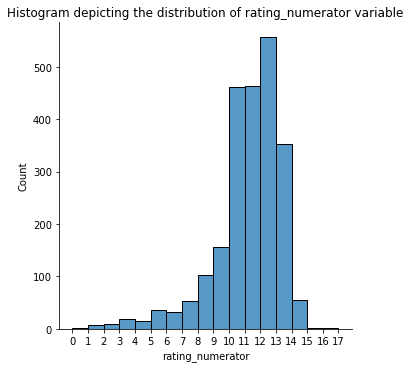

In [43]:
#plot a histogram depicting the distribution of rating_numerator variable
bins = np.arange(0, df_merge2['rating_numerator'].max()+1, 1)
sns.displot(df_merge2['rating_numerator'], bins = bins, kde=False)
plt.xticks(np.arange(0, df_merge2['rating_numerator'].max()+1, 1))
plt.title('Histogram depicting the distribution of rating_numerator variable')
plt.savefig('images/hist_rating.png', dpi=75, bbox_inches='tight');

- Plotting a histogram of the rating_numerator variable depicts the data as being left skewed. Most data points lie between 10 to 13 with 12 being the most frequent rating_numerator.

In [74]:
df_merge2['rating_numerator'].value_counts()

12    557
11    464
10    462
13    352
9     157
8     102
14     55
7      54
5      37
6      32
3      19
4      15
2       9
1       8
0       2
15      2
17      1
Name: rating_numerator, dtype: int64

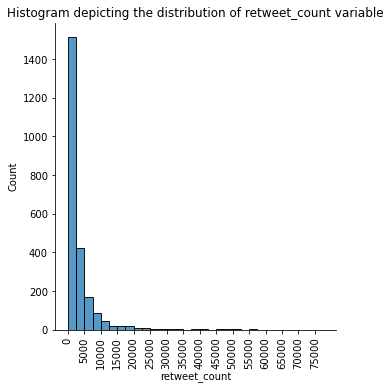

In [44]:
#plot a histogram depicting the distribution of retweet_count variable
bins = np.arange(0, df_merge2['retweet_count'].max()+5, 2500)
sns.displot(df_merge2['retweet_count'], bins = bins, kde=False)
plt.xticks(np.arange(0, df_merge2['retweet_count'].max()+5, 5000), rotation=90)
plt.title('Histogram depicting the distribution of retweet_count variable')
plt.savefig('images/hist_retweet.png', dpi=75, bbox_inches='tight');

- Plotting a histogram of the retweet_count variable depicts the data as being right-skewed. Most data points lie between 0 and 2500.

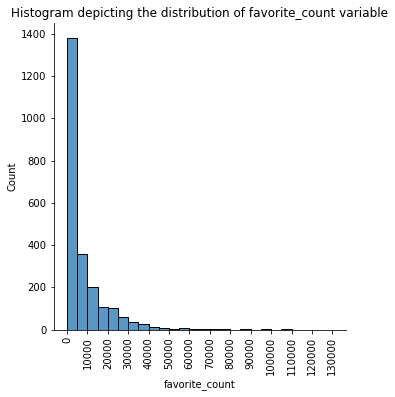

In [45]:
#plot a histogram depicting the distribution of favorite_count variable
bins = np.arange(0, df_merge2['favorite_count'].max()+5, 5000)
sns.displot(df_merge2['favorite_count'], bins = bins, kde=False)
plt.xticks(np.arange(0, df_merge2['favorite_count'].max()+5, 10000), rotation=90)
plt.title('Histogram depicting the distribution of favorite_count variable')
plt.savefig('images/hist_favorite.png', dpi=75, bbox_inches='tight');

- Plotting a histogram of the favorite_count variable depicts the data as being right-skewed. Most data points lie between 0 and 5000.

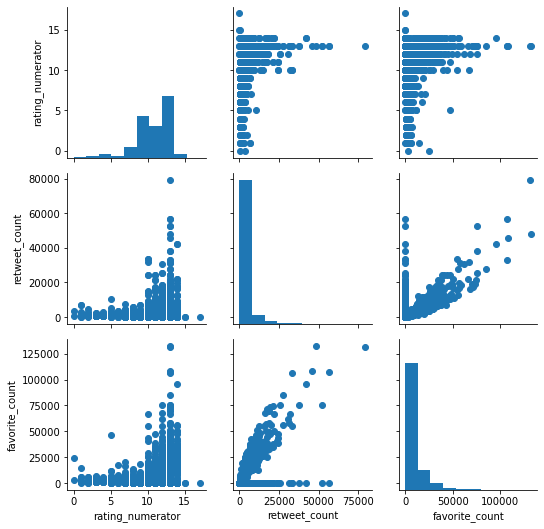

In [22]:
#plot a plot matrix to get the broad overview of pair-wise relationships between variables
df_stats = ['rating_numerator', 'retweet_count', 'favorite_count']
grid = sns.PairGrid(data=df_merge2, vars=df_stats)
grid=grid.map_offdiag(plt.scatter)
grid.map_diag(plt.hist);

Plot Matrix depicting the broad overview of pair-wise relationships between variables

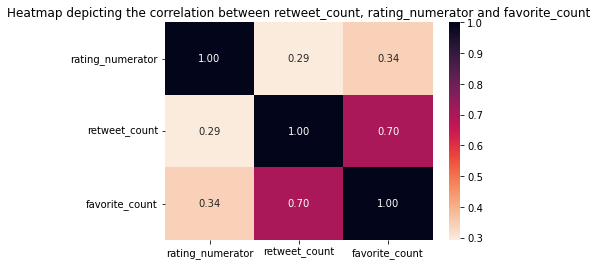

In [46]:
#plot a heatmap depicting the correlation between retweet_count, rating_numerator and favorite_count
sns.heatmap(df_merge2[df_stats].corr(), cmap='rocket_r', annot=True, fmt='.2f')
plt.title('Heatmap depicting the correlation between retweet_count, rating_numerator and favorite_count');
plt.savefig('images/heat_map.png', dpi=75, bbox_inches='tight');

- The above plot matrix and heatmap plots depict the correlation between retweet_count, rating_numerator and favorite_count variables. 
- There's strong correlation between retweet_count and favorite_count variables with correlation coefficient of 0.7. A scatter plot of retweet_count against favorite_count depict most data points showcasing a linear relationship between the two variables.
- There's weak correlation between rating_numerator and retweet_count with correlation coefficient of 0.29 and between rating_numerator andfavorite_count variables with correlation coefficient of 0.34. A scatter plot of rating_numerator against favorite_count and rating_numerator against retweet_count depict data points showcasing lack of linear relationship between the variables.

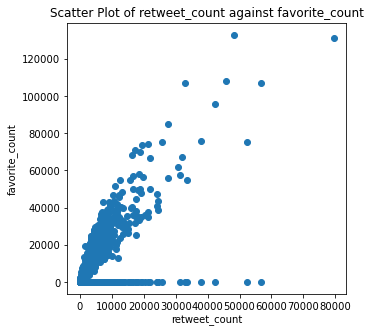

In [47]:
#plot a scatter plot of retweet_count against favorite_count
plt.figure(figsize=(5,5))
plt.scatter(data=df_merge2, x='retweet_count', y='favorite_count')
plt.xlabel('retweet_count')
plt.ylabel('favorite_count')
plt.title('Scatter Plot of retweet_count against favorite_count')
plt.savefig('images/scatter.png', dpi=75, bbox_inches='tight');

- There's strong correlation between retweet_count and favorite_count variables with correlation coefficient of 0.7. A scatter plot of retweet_count against favorite_count depict most data points showcasing a linear relationship between the two variables.

In [29]:
df_merge2[df_merge2['p1_dog'] == True]['p1'].value_counts()

golden_retriever      146
Labrador_retriever     97
Pembroke               88
Chihuahua              83
pug                    57
                     ... 
Scotch_terrier          1
EntleBucher             1
Japanese_spaniel        1
standard_schnauzer      1
silky_terrier           1
Name: p1, Length: 110, dtype: int64

- For the image predictions that were true dog breeds, golden_retriever, Labrador_retriever, Pembroke and Chihuahua respectively were the most frequent in the case of the first prediction.

In [93]:
df_merge2[df_merge2['p2_dog'] == True]['p2'].value_counts()

Labrador_retriever      104
golden_retriever         90
Cardigan                 73
Chihuahua                43
Pomeranian               42
                       ... 
Kerry_blue_terrier        1
Bernese_mountain_dog      1
EntleBucher               1
standard_schnauzer        1
komondor                  1
Name: p2, Length: 113, dtype: int64

- For the image predictions that were true dog breeds, Labrador_retriever, golden_retriever, Cardigan and Chihuahua respectively were the most frequent in the case of the second prediction.

In [32]:
df_merge2[df_merge2['p3_dog'] == True]['p3'].value_counts()

Labrador_retriever    77
Chihuahua             58
golden_retriever      47
Eskimo_dog            38
kelpie                35
                      ..
Sealyham_terrier       2
affenpinscher          1
Sussex_spaniel         1
Kerry_blue_terrier     1
standard_schnauzer     1
Name: p3, Length: 116, dtype: int64

- For the image predictions that were true dog breeds, Labrador_retriever,  Chihuahua and golden_retriever respectively were the most frequent in the case of the third prediction.

In [31]:
(df_merge2[(df_merge2['p1_dog'] == True) & (df_merge2['p1_conf'] >= 0.5)]['p1_conf'].size)/(df_merge2[(df_merge2['p1_dog'] == True)]['p1_conf'].size)

0.6352242744063324

- In the case of the first prediction involving dog images, 63.52% of the true dog breeds predictions made had confidence level equal to or greater than 0.5.

In [107]:
df_merge2[(df_merge2['p2_dog'] == True) & (df_merge2['p2_conf'] >= 0.5)]['p2_conf'].size

0

- In the case of the second prediction involving dog images, none of the true dog breeds predictions made had confidence level equal to or greater than 0.5.

In [111]:
df_merge2[(df_merge2['p3_dog'] == True) & (df_merge2['p3_conf'] >= 0.5)]['p3_conf'].size

0

- In the case of the third prediction involving dog images, also none of the true dog breeds predictions made had confidence level equal to or greater than 0.5.

In [98]:
(df_merge2[df_merge2['p1_dog'] == True]['p1'].value_counts().size)/(df_merge2['p1_dog'].size)

0.04725085910652921

- In the case of the first prediction involving dog images, only 4.73% of the predictions made were true dog breeds.

In [97]:
(df_merge2[df_merge2['p2_dog'] == True]['p2'].value_counts().size)/(df_merge2['p2_dog'].size)

0.048539518900343644

- In the case of the second prediction involving dog images, only 4.85% of the predictions made were true dog breeds.

In [96]:
(df_merge2[df_merge2['p3_dog'] == True]['p3'].value_counts().size)/(df_merge2['p3_dog'].size)

0.04982817869415808

- In the case of the third prediction involving dog images, only 4.98% of the predictions made were true dog breeds.

### Insights:
#### 1. Distribution of Variables of Interest
- A histogram of the rating_numerator variable depicts the data as being left skewed. Most data points lie between 10 to 13 with 12 being the most frequent rating_numerator.
- A histogram of the retweet_count variable depicts the data as being right-skewed. Most data points lie between 0 and 2500.
- A histogram of the favorite_count variable depicts the data as being right-skewed. Most data points lie between 0 and 5000.

#### 2. Relationship between Variables of interest 
- There's strong correlation between retweet_count and favorite_count variables with correlation coefficient of 0.7. A scatter plot of retweet_count against favorite_count depict most data points showcasing a linear relationship between the two variables.
      
- There's weak correlation between rating_numerator and retweet_count with correlation coefficient of 0.29 and between rating_numerator and favorite_count variables with correlation coefficient of 0.34. A scatter plot of rating_numerator against favorite_count and rating_numerator against retweet_count depict data points showcasing lack of linear relationship between the variables.

#### 3. Analysis of Image Predictions
##### Most Frequent Dog Breeds
- For the image predictions that were true dog breeds, golden_retriever, Labrador_retriever, Pembroke and Chihuahua respectively were the most frequent in the case of the first prediction.
- For the image predictions that were true dog breeds, Labrador_retriever, golden_retriever, Cardigan and Chihuahua respectively were the most frequent in the case of the second prediction.
- For the image predictions that were true dog breeds, Labrador_retriever, Chihuahua and golden_retriever respectively were the most frequent in the case of the third prediction.
##### Proportion of True Dog Breeds Predictions
- In the case of the first prediction involving dog images, only 4.73% of the predictions made were true dog breeds.
- In the case of the second prediction involving dog images, only 4.85% of the predictions made were true dog breeds.
- In the case of the third prediction involving dog images, only 4.98% of the predictions made were true dog breeds.
##### Confidence Level of Predictions
- In the case of the first prediction of dog images, 63.52% of the true dog breeds predictions made had confidence level equal to or greater than 0.5.
- In the case of the second prediction of dog images, none of the true dog breeds predictions made had confidence level equal to or greater than 0.5.
- In the case of the third prediction of dog images, also none of the true dog breeds predictions made had confidence level equal to or greater than 0.5.

### Visualization

![Hostogram](images/hist_rating.png)
- Plotting a histogram of the rating_numerator variable depicts the data as being left skewed. Most data points lie between 10 to 13 with 12 being the most frequent rating_numerator.


![Hostogram](images/hist_retweet.png)
- Plotting a histogram of the retweet_count variable depicts the data as being right-skewed. Most data points lie between 0 and 2500.

![Hostogram](images/hist_favorite.png)
- Plotting a histogram of the favorite_count variable depicts the data as being right-skewed. Most data points lie between 0 and 5000.

![Scatter](images/scatter.png)
- There's strong correlation between retweet_count and favorite_count variables with correlation coefficient of 0.7. A scatter plot of retweet_count against favorite_count depict most data points showcasing a linear relationship between the two variables.

![Heatmap](images/heat_map.png)
- The above plot matrix and heatmap plots depict the correlation between retweet_count, rating_numerator and favorite_count variables.